In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Li_initial = json.load(open('Li.json'))
initial = json.load(open('pyscf_initial_output.json'))
red = json.load(open('pyscf_red_output.json'))
oxi = json.load(open('pyscf_ox_output.json'))

In [3]:
len(initial),len(red),len(oxi)

(27, 27, 27)

In [4]:
keys_initial = [key.split('_')[0] for key in initial.keys()]
keys_ox = [key.split('+')[0] for key in oxi.keys()]
keys_red = [key.split('L')[0] for key in red.keys()]
total_keys = list(set(keys_initial) & set(keys_ox) & set(keys_red))

In [5]:
def cal_solvation_Gibbs(date):
    return date['e_dft_solv'] - date['e_dft_gas']
def cal_ox_potential(initial, ox):
    G_init_gas = initial["G_gas"]
    G_ox_gas = ox["G_gas"]
    G_solvation_init = cal_solvation_Gibbs(initial)
    G_solvation_ox = cal_solvation_Gibbs(ox)
    E_potential = (G_ox_gas - G_init_gas + G_solvation_ox - G_solvation_init)*2625.5002/96485.33212331001*1000-1.44
    return E_potential
def cal_red_potential(initial, red, Li):
    G_init_gas = initial["G_gas"]
    G_Liion_gas = Li["G_gas"]
    G_red_gas = red["G_gas"]
    G_solvation_init = cal_solvation_Gibbs(initial) + cal_solvation_Gibbs(Li)
    G_solvation_red = cal_solvation_Gibbs(red)
    E_potential = -(G_red_gas - G_init_gas - G_Liion_gas + G_solvation_red - G_solvation_init)*2625.5002/96485.33212331001*1000-1.44
    return E_potential


In [6]:
E_potential_dict = {}
for key in total_keys:
    if key+"_e20" in initial.keys():
        key_initial = key+"_e20"
    else:
        key_initial = key
    if key+"Li_e20" in red.keys():
        key_red = key+"Li_e20"
    if key+"+_e20" in oxi.keys():
        key_ox = key+"+_e20"
    else:
        key_ox = key+"+"
    if key+"Li_e20" in red.keys():
        key_red = key+"Li_e20"
    else:
        key_red = key+"Li"
    E_ox = cal_ox_potential(initial[key_initial]["reaction_info"]["ori_init"], oxi[key_ox]["reaction_info"]["ori_init"])
    E_red = cal_red_potential(initial[key_initial]["reaction_info"]["ori_init"], red[key_red]["reaction_info"]["ori_init"], Li_initial['Li']["reaction_info"]["ori_init"])
    E_potential_dict[key] = [E_red, E_ox]

In [7]:
E_potential_dict

{'DMC': [0.12093608076245554, 7.2204618975945944],
 'EC': [0.28364591722798815, 7.575233743052994],
 'MF': [0.3084543308358212, 6.977627834690704],
 'iPF': [0.2836610637357464, 6.819515960850797],
 'nBN': [0.08789541738897633, 7.469157488645559],
 'PF': [0.4370146674808728, 6.8469985425341555],
 'MP': [0.11311522711945798, 6.88874891964174],
 'EMC': [-0.014713839980370569, 6.989654033528794],
 'iBA': [0.15683841485297823, 6.575359277088642],
 'VC': [0.44946125218876487, 5.780425275247991],
 'PA': [0.14329333061686644, 6.588107199163209],
 'iPA': [0.15118856488689802, 6.490780702661539],
 'DMF': [0.052097192814071214, 5.528780152664925],
 'nBF': [0.43215437420981484, 6.847065958835426],
 'EA': [0.14585002860654983, 6.510954145282836],
 'EF': [0.3013776515655835, 7.254083026124787],
 'PCN': [0.09739129190879425, 7.911516775897706],
 'MEK': [0.5203470911730821, 5.879631441556038],
 'ACN': [0.06032516564748702, 8.141366993738275],
 'BA': [0.1460607778126335, 6.594443612037443],
 'PC': [0.2

In [8]:
E_ref={
 'PF': [0.47, 6.88],
 'PA': [0.19, 6.59],
 'BA': [0.22, 6.57],
 'MEK': [0.53, 5.93],
 'EC': [0.27, 7.19],
 'EFA': [0, 0],
 'VC': [0.46, 5.79],
 'DMC': [0.10, 7.06],
 'iBF': [0.45, 6.84],
 'EA': [0.19, 6.57],
 'EF': [0.31, 6.92],
 'MB': [0.17, 6.61],
 'EMC': [0.10, 6.97],
 'iPF': [0.32, 6.51],
 'MP': [0.13, 6.89],
 'PC': [0.22, 7.13],
 'MF': [0.31, 7.02],
 'Aceto': [1.71, 5.99],
 'FEA': [0, 0],
 'FEC': [0.51, 7.48],
 'DMF': [0.09, 5.55],
 'iBA': [0.16, 6.58],
 'iPA': [0.15, 6.51],
 'PF': [0.15, 6.51],
 'DEC': [0.07, 6.95],
 'nBN': [0.07, 7.47],
 'iBN': [0.15, 7.54],
 'nBF': [0.46, 6.87],
 'ACN': [0.11, 8.13],
}

In [9]:
len(E_ref)

28

In [10]:
for i in E_potential_dict:
    if i not in E_ref:
        print(i)

PCN


In [11]:
for key in E_potential_dict.keys():
    if key not in E_ref:
        continue
    print(E_potential_dict[key][0]-E_ref[key][0], E_potential_dict[key][1]-E_ref[key][1])

0.02093608076245554 0.16046189759459484
0.013645917227988136 0.38523374305299374
-0.001545669164178809 -0.04237216530929544
-0.03633893626425361 0.30951596085079736
0.01789541738897632 -0.0008425113544410223
0.2870146674808728 0.33699854253415573
-0.01688477288054202 -0.0012510803582594932
-0.11471383998037057 0.019654033528794024
-0.003161585147021778 -0.004640722911357642
-0.01053874781123515 -0.009574724752009267
-0.04670666938313356 -0.0018928008367904425
0.0011885648868980303 -0.01921929733846106
-0.03790280718592878 -0.021219847335074427
-0.02784562579018518 -0.022934041164574204
-0.04414997139345017 -0.05904585471716395
-0.008622348434416505 0.33408302612478735
-0.009652908826917939 -0.05036855844396193
-0.04967483435251298 0.011366993738274545
-0.07393922218736651 0.02444361203744272
0.024706838736167275 -0.005389553885751575
-1.1824911637088853 -0.03382298206071255
-0.0009733465211562708 -0.005589805559645278
-0.00289397823338175 0.03846839505859467
-0.019349337261302557 -0.32

In [23]:
E_potential_plot_dict = {}
for key in E_potential_dict.keys():
    if key not in E_ref:
        continue
    if E_potential_dict[key][0]<=0:
        continue
    if key == "Aceto":
        key_test = "DMK"
    elif key == "PF":
        key_test = "nPF"
    elif key == "BA":
        key_test = "nBA"
    else:
        key_test = key
    E_potential_plot_dict[key_test] = [E_potential_dict[key][0], E_potential_dict[key][1], E_ref[key][0], E_ref[key][1]]
    

In [24]:
import matplotlib.pyplot as plt
# Set rcParams for academic paper
params = {
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'Times', 'Palatino'],
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
    'grid.color': 'gray',
    'legend.fontsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.figsize': (8, 6),  # Adjust according to your preference
    'figure.dpi': 100,
    'lines.linewidth': 2,
    'savefig.dpi': 300,
    'savefig.format': 'pdf',  # or 'eps' or 'svg'
    'text.usetex': True,  # Use LaTeX for text
}
plt.rcParams.update(params)

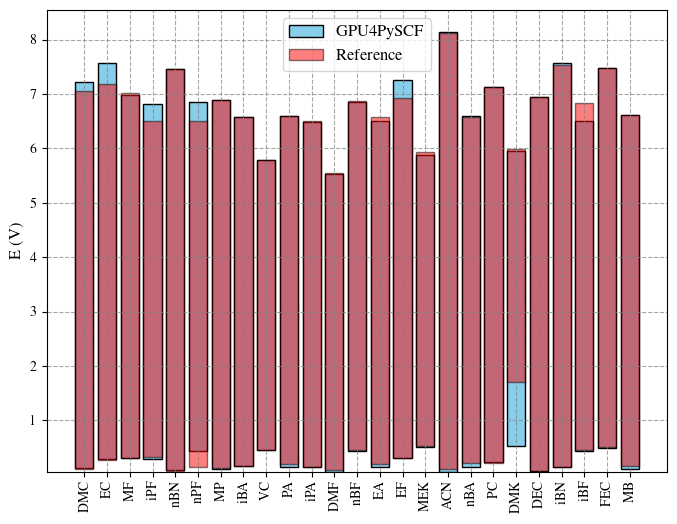

In [25]:
items = [key for key in E_potential_plot_dict.keys()]
bottoms = [E_potential_plot_dict[key][0] for key in E_potential_plot_dict]
heights = [E_potential_plot_dict[key][1] - E_potential_plot_dict[key][0]for key in E_potential_plot_dict]
plt.bar(items, heights, bottom=bottoms, color='skyblue', edgecolor='black', label="GPU4PySCF")
items = [key for key in E_potential_plot_dict]
bottoms = [E_potential_plot_dict[key][2] for key in E_potential_plot_dict]
heights = [E_potential_plot_dict[key][3] - E_potential_plot_dict[key][2] for key in E_potential_plot_dict]
plt.bar(items, heights, bottom=bottoms, color='red', edgecolor='black', alpha=0.5, label="Reference")
plt.xticks(rotation=90)
plt.ylabel('E (V)')
plt.legend()
plt.savefig("ecwindow.pdf")
plt.show()

In [15]:
E_potential_dict.keys()

dict_keys(['DMF', 'FEC', 'iPA', 'MEK', 'PCN', 'MF', 'MB', 'iPF', 'ACN', 'PA', 'Aceto', 'EC', 'BA', 'DMC', 'iBA', 'EF', 'EA', 'iBF', 'EMC', 'VC', 'MP', 'iBN', 'DEC', 'PC', 'PF', 'nBN'])

In [41]:
def cal_ox_potential_debug(initial, ox):
    G_init_gas = initial["G_gas"]
    G_ox_gas = ox["G_gas"]
    G_solvation_init = cal_solvation_Gibbs(initial)
    G_solvation_ox = cal_solvation_Gibbs(ox)
    E_potential = (G_ox_gas - G_init_gas)*2625.5002/96485.33212331001*1000-1.44
    return E_potential
def cal_red_potential_debug(initial, red, Li):
    G_init_gas = initial["G_gas"]
    G_Liion_gas = Li["G_gas"]
    G_red_gas = red["G_gas"]
    G_solvation_init = cal_solvation_Gibbs(initial) + cal_solvation_Gibbs(Li)
    G_solvation_red = cal_solvation_Gibbs(red)
    E_potential = -(G_red_gas - G_init_gas - G_Liion_gas)*2625.5002/96485.33212331001*1000-1.44
    return E_potential


In [42]:
E_potential_dict_debug = {}
for key in total_keys:
    if key+"_e20" in initial.keys():
        key_initial = key+"_e20"
    else:
        key_initial = key
    if key+"Li_e20" in red.keys():
        key_red = key+"Li_e20"
    if key+"+_e20" in oxi.keys():
        key_ox = key+"+_e20"
    else:
        key_ox = key+"+"
    if key+"Li_e20" in red.keys():
        key_red = key+"Li_e20"
    else:
        key_red = key+"Li"
    E_ox = cal_ox_potential_debug(initial[key_initial]["reaction_info"]["ori_init"], oxi[key_ox]["reaction_info"]["ori_init"])
    E_red = cal_red_potential_debug(initial[key_initial]["reaction_info"]["ori_init"], red[key_red]["reaction_info"]["ori_init"], Li_initial['Li']["reaction_info"]["ori_init"])
    E_potential_dict_debug[key] = [E_red, E_ox]

In [52]:
E_potential_plot_dict_debug = {}
for key in E_potential_dict_debug.keys():
    if key not in E_ref:
        continue
    # if E_potential_dict[key][0]<=0:
    #     continue
    # if key == "Aceto":
    #     key_test = "DMK"
    # elif key == "PF":
    #     key_test = "nPF"
    # elif key == "BA":
    #     key_test = "nBA"
    # else:
    #     key_test = key
    E_potential_plot_dict_debug[key] = [E_potential_dict_debug[key][0], E_potential_dict_debug[key][1], E_ref[key][0], E_ref[key][1]]
    

In [53]:
items = [key for key in E_potential_plot_dict_debug.keys()]
bottoms = [E_potential_plot_dict_debug[key][0] for key in E_potential_plot_dict_debug]
heights = [E_potential_plot_dict_debug[key][1] - E_potential_plot_dict_debug[key][0]for key in E_potential_plot_dict_debug]
plt.bar(items, heights, bottom=bottoms, color='skyblue', edgecolor='black', label="GPU4PySCF")
items = [key for key in E_potential_plot_dict_debug]
bottoms = [E_potential_plot_dict_debug[key][2] for key in E_potential_plot_dict_debug]
heights = [E_potential_plot_dict_debug[key][3] - E_potential_plot_dict_debug[key][2] for key in E_potential_plot_dict_debug]
plt.bar(items, heights, bottom=bottoms, color='red', edgecolor='black', alpha=0.5, label="Data from REF.")
plt.xticks(rotation=90)
plt.ylabel('E (V)')
plt.legend()
plt.savefig("ecwindow.pdf")
plt.show()